# What if we had a nice library to work with the NCAS Obs data?

We could package up little code snippets into reusable functions, e.g...

Import some packages we need:

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

And now do something with real data...

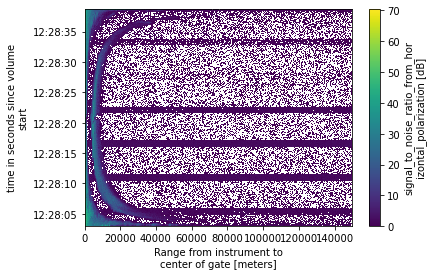

In [2]:
x_band_file = "/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20201218/" \
              "ncas-mobile-x-band-radar-1_sandwith_20201218-122803_RHI_v1.nc"

ds = xr.open_dataset(x_band_file)
da = ds["SNR"]

da.plot()

Make it into some re-usable functions that can take a date and time...

In [3]:
import glob
import os

def search_x_band(start, end):
    """
    Searches date range for x-band radar data.
    
    :param start: string ("YYYYMMDD")
    :param end:   string ("YYYYMMDD")
    :returns:     a list of valid file paths.
    """
    base_dir = "/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi"
    date_dirs = os.listdir(base_dir)
    
    matches = [os.path.join(base_dir, dr) for dr in date_dirs if dr >= start and dr <= end]
    files = []
    
    for dr in matches:
        files.extend(glob.glob(f"{dr}/*.nc"))
        
    return files

In [4]:
file_paths = search_x_band("20200220", "20200221")

In [5]:
print(len(file_paths))
file_path = file_paths[0]

481


Add a function to plot a given file

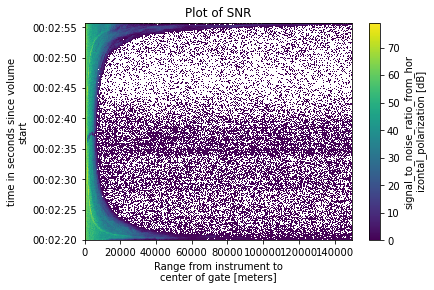

In [6]:
def plot_x_band(file_path, variable):
    "Read file, select variable and plot."
    ds = xr.open_dataset(file_path)
    da = ds[variable]
    p = da.plot()
    p.axes.set_title(f"Plot of {variable}")
    
p = plot_x_band(file_path, "SNR")

In [7]:
for data_var in ds.data_vars:
    print(data_var, end=",  ")

volume_number,  platform_type,  primary_axis,  status_xml,  instrument_type,  radar_antenna_gain_h,  radar_antenna_gain_v,  radar_beam_width_h,  radar_beam_width_v,  radar_rx_bandwidth,  time_coverage_start,  time_coverage_end,  grid_mapping,  latitude,  longitude,  altitude,  altitude_agl,  sweep_number,  sweep_mode,  polarization_mode,  prt_mode,  follow_mode,  fixed_angle,  target_scan_rate,  sweep_start_ray_index,  sweep_end_ray_index,  rays_are_indexed,  ray_angle_res,  r_calib_time,  r_calib_pulse_width,  r_calib_xmit_power_h,  r_calib_xmit_power_v,  r_calib_two_way_waveguide_loss_h,  r_calib_two_way_waveguide_loss_v,  r_calib_two_way_radome_loss_h,  r_calib_two_way_radome_loss_v,  r_calib_receiver_mismatch_loss,  r_calib_k_squared_water,  r_calib_radar_constant_h,  r_calib_radar_constant_v,  r_calib_antenna_gain_h,  r_calib_antenna_gain_v,  r_calib_noise_hc,  r_calib_noise_vc,  r_calib_noise_hx,  r_calib_noise_vx,  r_calib_i0_dbm_hc,  r_calib_i0_dbm_vc,  r_calib_i0_dbm_hx,  r_ca

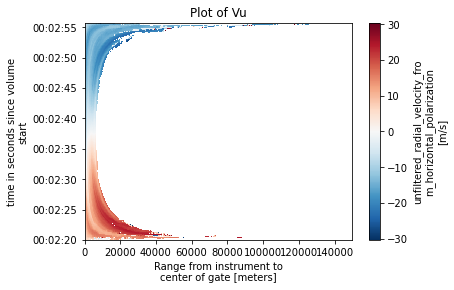

In [8]:
plot_x_band(file_path, "Vu")

In [9]:
!ls /badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/cardinal/2022/01/nerc-mstrf-radar-mst_capel-dewi_20220101_st300_cardinal_33min-smoothing_v4-0.nc

/badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/cardinal/2022/01/nerc-mstrf-radar-mst_capel-dewi_20220101_st300_cardinal_33min-smoothing_v4-0.nc


In [10]:
ncas_mst_file = "/badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/"  \
                "cardinal/2022/01/nerc-mstrf-radar-mst_capel-dewi_20220101_st300_cardinal_33min-smoothing_v4-0.nc"

In [11]:
ds = xr.open_dataset(ncas_mst_file)

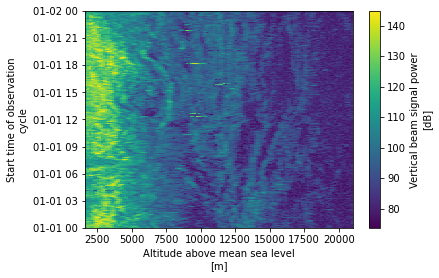

In [12]:
da = ds['signal_power']
da.shape
da.plot()

In [13]:
dt = da.transpose()

In [14]:
dt.shape, da.shape

((130, 276), (276, 130))

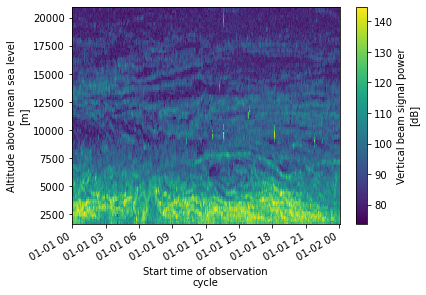

In [15]:
dt.plot()

In [16]:
paths = """
/badc/ncas-mobile/data/ncas-radar-wind-profiler-1/20200101_capel-dewi/v8.0/2020/07/ncas-radar-wind-profiler-1_capel-dewi_20200701_snr-winds_high-range-mode-15min_v8.0.nc

/badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/cardinal/2020/07/nerc-mstrf-radar-mst_capel-dewi_20200701_st300_cardinal_33min-smoothing_v4-0.nc

/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20201218/ncas-mobile-x-band-radar-1_sandwith_20201218-122803_RHI_v1.nc

/badc/ncas-mobile/data/ncas-lidar-dop-1/20180801_moccha/v1.0/ncas-lidar-dop-1_oden_20180801_aerosol-backscatter-radial-winds_fixed_co_standard_v1.0.nc
""".strip().split()

paths

['/badc/ncas-mobile/data/ncas-radar-wind-profiler-1/20200101_capel-dewi/v8.0/2020/07/ncas-radar-wind-profiler-1_capel-dewi_20200701_snr-winds_high-range-mode-15min_v8.0.nc',
 '/badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/cardinal/2020/07/nerc-mstrf-radar-mst_capel-dewi_20200701_st300_cardinal_33min-smoothing_v4-0.nc',
 '/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20201218/ncas-mobile-x-band-radar-1_sandwith_20201218-122803_RHI_v1.nc',
 '/badc/ncas-mobile/data/ncas-lidar-dop-1/20180801_moccha/v1.0/ncas-lidar-dop-1_oden_20180801_aerosol-backscatter-radial-winds_fixed_co_standard_v1.0.nc']

In [17]:
def show_vars(fpath):
    ds = xr.open_dataset(fpath)
    t = ds.time.values
    print(t[0], t[-1])
    for var_id in ds.data_vars:
        if "wind" in var_id.lower():
            print(var_id, end=", ")


In [18]:
for fpath in paths:
    print(f"\n-------------\n[INFO] {fpath}")
    show_vars(fpath)


-------------
[INFO] /badc/ncas-mobile/data/ncas-radar-wind-profiler-1/20200101_capel-dewi/v8.0/2020/07/ncas-radar-wind-profiler-1_capel-dewi_20200701_snr-winds_high-range-mode-15min_v8.0.nc
2020-07-01T00:00:00.000000000 2020-07-01T23:45:00.000000000
eastward_wind, northward_wind, wind_speed, wind_from_direction, qc_flag_wind, 
-------------
[INFO] /badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/cardinal/2020/07/nerc-mstrf-radar-mst_capel-dewi_20200701_st300_cardinal_33min-smoothing_v4-0.nc
2020-07-01T00:01:27.000000000 2020-07-01T23:55:30.000000000
eastward_wind, northward_wind, upward_wind, qc_flag_horizontal_wind, horizontal_wind_compensation_factor, 
-------------
[INFO] /badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20201218/ncas-mobile-x-band-radar-1_sandwith_20201218-122803_RHI_v1.nc
2020-12-18T12:28:03.000000000 2020-12-18T12:28:38.698999999

-------------
[INFO] /badc/ncas-mobile/data/ncas-lidar-dop-1/20180801_moccha/v1.0

In [19]:
import os, glob

def has_var(fpath, var_id):
    ds = xr.open_dataset(fpath)
    ds.data_vars
    if var_id in ds.data_vars:
        return True

    return False

files_to_aggregate = []
for nc_file in glob.glob("/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/*00????_RHI_v1.nc"):
    #res = has_var(nc_file, "eastward_wind")
   #if res: 
    print(nc_file)
    files_to_aggregate.append(nc_file)

/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-000026_RHI_v1.nc
/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-000622_RHI_v1.nc
/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-001216_RHI_v1.nc
/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-001811_RHI_v1.nc
/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-002417_RHI_v1.nc
/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-003012_RHI_v1.nc
/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-00

In [20]:
print(paths)
print(files_to_aggregate)
print(f"We want to read in a series of files as a single time series, there are {len(files_to_aggregate)} files.")

['/badc/ncas-mobile/data/ncas-radar-wind-profiler-1/20200101_capel-dewi/v8.0/2020/07/ncas-radar-wind-profiler-1_capel-dewi_20200701_snr-winds_high-range-mode-15min_v8.0.nc', '/badc/ncas-cdao/data/ncas-mst-radar-1/19890905_longterm/previous_v4/st-mode/cardinal/2020/07/nerc-mstrf-radar-mst_capel-dewi_20200701_st300_cardinal_33min-smoothing_v4-0.nc', '/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20201218/ncas-mobile-x-band-radar-1_sandwith_20201218-122803_RHI_v1.nc', '/badc/ncas-mobile/data/ncas-lidar-dop-1/20180801_moccha/v1.0/ncas-lidar-dop-1_oden_20180801_aerosol-backscatter-radial-winds_fixed_co_standard_v1.0.nc']
['/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-000026_RHI_v1.nc', '/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/20181025_raine/v1.0/rhi/20200101/ncas-mobile-x-band-radar-1_sandwith_20200101-000622_RHI_v1.nc', '/badc/ncas-mobile/data/ncas-mobile-x-band-radar-1/

In [21]:
wp, mst = paths[:2]

2020-07-01T00:00:00.000000000 2020-07-01T23:45:00.000000000
eastward_wind, northward_wind, wind_speed, wind_from_direction, qc_flag_wind, 
2020-07-01T00:01:27.000000000 2020-07-01T23:55:30.000000000
eastward_wind, northward_wind, upward_wind, qc_flag_horizontal_wind, horizontal_wind_compensation_factor, 

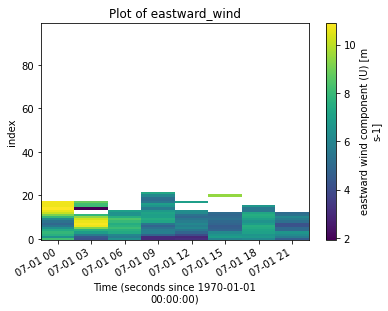

In [30]:
def plot_var(fpath, variable, sampling_freq="1h", sampling_method="nearest"):
    "Read file, select variable and plot."
    ds = xr.open_dataset(fpath)
    da = ds[variable].transpose()
    
    # Check resampling method exists
    if not sampling_method in dir(da.resample(time=sampling_freq)):
        raise Exception(f"Cannot do: {sampling_method}")

    d2 = getattr(da.resample(time=sampling_freq), "nearest")(tolerance=sampling_freq)
    p = d2.plot()
    p.axes.set_title(f"Plot of {variable}")
    
varid = "eastward_wind"
show_vars(wp)
print()
show_vars(mst)
freq = "3h" # 10 minutes
method = "mean"
plot_var(wp, varid, freq, method)

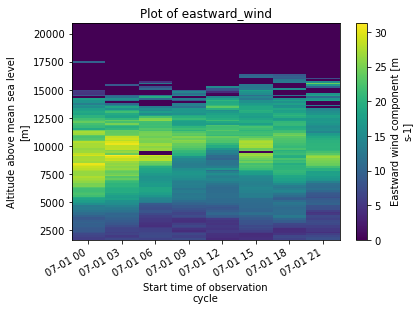

In [31]:
plot_var(mst, varid, freq, method)

## Aggregating multiple files into a single code "object"

Let's try reading in 11 NC files at once...

In [24]:
agg_ds = xr.open_mfdataset(files_to_aggregate)
file_ds = xr.open_dataset(files_to_aggregate[0])

In [25]:
len(file_ds.time), len(agg_ds.time)

(358, 3938)

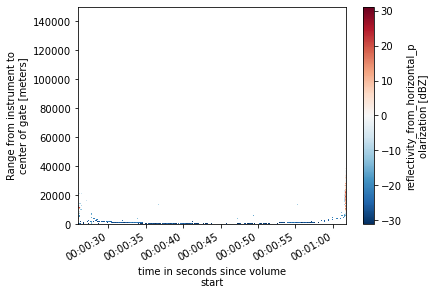

In [26]:
file_ds["dBZ"].transpose().plot()

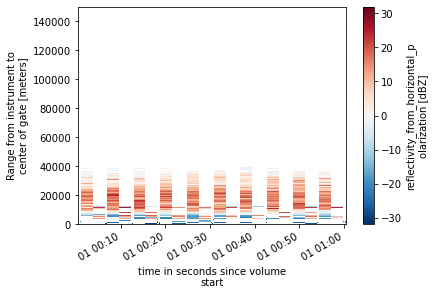

In [27]:
agg_ds["dBZ"].transpose().plot()

In [28]:
!git commit -am 'Added aggregation over multiple files'

[main 920ab14] Added aggregation over multiple files
 1 file changed, 46 insertions(+), 1 deletion(-)


In [29]:
!git push 

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 24 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 911 bytes | 911.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/agstephens/ncas-obs-sprint-feb-22.git
   8111e99..920ab14  main -> main
